In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

In [2]:
url_main = 'https://filmschoolrejects.com/bond-girls-ranked/'
NAMES_UNCLEANED = []

#Go over the 6 website pages and scrape <h3> elements from them

i = 1
while i<=6:
    
    if i == 1:
        url = url_main
    else:
        url = url_main + str(i) + '/'
        
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html')
    headers_on_page = soup.find_all('h3')
    for header in headers_on_page:
        NAMES_UNCLEANED.append(header.get_text())

    i+=1

In [3]:
print(NAMES_UNCLEANED) #I'll come back to this later

['55. Tiffany Case', '54. Log Cabin Girl, a.k.a. Martine Blanchaud', '53. Plenty O’Toole', '52. Caroline', '51. Pola Ivanova', 'Recommended Reading', '50. Paula Caplan', '49. Paris Carver', '48. Molly Warmflash', '47. Ling', '46. Solange Dimitrios', '45. Miss Taro', '44. Patricia Fearing', '43. Rosie Carver', '42. Sévérine', '41. Melina Havelock', 'Recommended Reading', '40. Nancy', '39. Kissy Suzuki', '38. Corinne Dufour', '37. Magda', '', '36. Stacey Sutton', '35. Octopussy', '34. Jinx Johnson', '33. Christmas Jones', '32. Kara Milovy', '31. Countess Lisl von Schlaf', 'Recommended Reading', '30. Manuela', '29. Strawberry Fields', '28. Mary Goodnight', '27. Jill Masterson', '26. Tilly Masterson', '25. Ruby Bartlett', '24. Lupe Lamora', '23. Fiona Volpe', '22. Honey Ryder', '21. Madeleine Swann', 'Recommended Reading', '20. Aki', '19. Lucia Sciarra', '18. Holly Goodhead', '17. Miranda Frost', '16. Solitaire', '', '15. Natalya Simonova', '14. Anya Amasova', '13. Andrea Anders', '12. May

In [4]:
strings_list = []

#Do the same with <p> elements, here I'll have some empty strings, long description entries that i'm not interested in, and entires
#that start with 'Played by:', that I know will also have an 'Appears in:' section, followed by the movies' name that I want to scrape

i = 1
while i<=6:

    if i == 1:
        url = url_main
    else:
        url = url_main + str(i) + '/'
        
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html')
    
    appears_in_paragraphs = soup.find_all('p')

    for p in appears_in_paragraphs:
        strings_list.append(p.get_text())

    i+=1


strings_list = [x for x in strings_list if x != ""] #remove empty entries
strings_list = [entry for entry in strings_list if "Played by:" in entry] #remove all entries not starting with "Played by" (all the long descriptions)
prefix = "Appears in: "
movies_uncleaned = []
    
for string in strings_list: #Go over all strings and delete everything before the 'Appears in:' segment, then append the rest to the list of movie names
    substring = string.split(prefix, 1)[-1]
    movies_uncleaned.append(substring)

print(movies_uncleaned)

['Diamonds are Forever', 'The Spy Who Loved Me', 'Diamonds are Forever', 'GoldenEye', 'A View to a Kill', 'Thunderball', 'Tomorrow Never Dies', 'The World Is Not Enough', 'You Only Live Twice', 'Casino Royale', 'Dr. No', 'Thunderball', 'Live and Let Die', 'Skyfall', 'For Your Eyes Only', 'On Her Majesty’s Secret Service', 'You Only Live Twice', 'Moonraker', 'Octopussy', 'A View to a Kill', 'Octopussy', 'Die Another Day', 'The World Is Not Enough', 'The Living Daylights', 'For Your Eyes Only', 'Moonraker', 'Quantum of Solace', 'The Man With The Golden Gun', 'Goldfinger', 'Goldfinger', 'On Her Majesty’s Secret Service', 'Licence to Kill', 'Thunderball', 'Dr. No', 'Spectre', 'You Only Live Twice', 'Spectre', 'Moonraker', 'Die Another Day', 'Live and Let Die', 'GoldenEye', 'The Spy Who Loved Me', 'The Man With the Golden Gun', 'A View to a Kill', 'Thunderball', 'Quantum of Solace', 'The World Is Not Enough', 'Tomorrow Never Dies', 'Goldfinger', 'GoldenEye', 'Dr. No; From Russia With Love',

In [5]:
NAMES_UNCLEANED = [x for x in NAMES_UNCLEANED if x != "Recommended Reading"] #Remove unrelated <h3> header
NAMES_UNCLEANED = [x for x in NAMES_UNCLEANED if x != ""] #Remove empty entries

In [6]:
INDEX = []
NAMES = []

#Go over all name entries and separate the ranking from the actual name
for name in NAMES_UNCLEANED:
    INDEX.append(int(name.split(". ", 1)[0]))
    NAMES.append(name.split(". ")[1])


In [7]:
#Since I want to represent how attractive a bond girl is on an increasing scale, I just flip the ranking index
#(now the lowest ranked bond girl will have the lowest score)

FLIPPED = INDEX[::-1]
print(FLIPPED)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]


In [8]:
#Create dataframe from given results

data = {
    'Attractiveness rating':FLIPPED,
    'Name':NAMES,
    'Movie':movies_uncleaned
}

In [9]:
df = pd.DataFrame(data)
df.head(55)

,Attractiveness rating,Name,Movie
0,1,Tiffany Case,Diamonds are Forever
1,2,"Log Cabin Girl, a.k.a",The Spy Who Loved Me
2,3,Plenty O’Toole,Diamonds are Forever
3,4,Caroline,GoldenEye
4,5,Pola Ivanova,A View to a Kill
5,6,Paula Caplan,Thunderball
6,7,Paris Carver,Tomorrow Never Dies
7,8,Molly Warmflash,The World Is Not Enough
8,9,Ling,You Only Live Twice
9,10,Solange Dimitrios,Casino Royale


In [10]:
#Load main dataframe so i can merge them and access both the attractiveness rating and the imdb score
main_df = pd.read_csv("james_bond_data_cleaned.csv")
main_df.head(50)

,release_date,movie_title,bond_actor,car_manufacturer,income_usa,income_world,movie_budget,film_length,imdb,rotten_tomatoes,martinis_consumed,bond_kills,release_year
0,1962-06-01,Dr. No,Sean Connery,Sunbeam,1.606704e+09,5.956704e+09,1.000000e+08,110,7.3,7.7,2,4,1962
1,1963-08-01,From Russia with Love,Sean Connery,Bentley,2.480000e+09,7.890000e+09,2.000000e+08,115,7.5,8.0,0,11,1963
2,1964-05-01,Goldfinger,Sean Connery,Aston Martin,5.110000e+09,1.249000e+10,3.000000e+08,110,7.8,8.4,1,9,1964
3,1965-09-01,Thunderball,Sean Connery,Aston Martin,6.360000e+09,1.412000e+10,9.000000e+08,130,7.0,6.8,0,20,1965
4,1967-11-01,You Only Live Twice,Sean Connery,Toyota,4.310000e+09,1.116000e+10,9.500000e+08,117,6.9,6.3,1,21,1967
5,1969-07-01,On Her Majesty's Secret Service,George Lazenby,Mercury,2.280000e+09,8.200000e+09,8.000000e+08,142,6.8,6.7,1,5,1969
6,1971-03-01,Diamonds Are Forever,Sean Connery,Ford,4.380000e+09,1.160000e+10,7.200000e+08,120,6.7,6.3,0,7,1971
7,1973-08-01,Live and Let Die,Roger Moore,AMC,3.540000e+09,1.618000e+10,7.000000e+08,121,6.8,5.9,0,8,1973
8,1974-07-01,The Man with the Golden Gun,Roger Moore,AMC,2.100000e+09,9.760000e+09,7.000000e+08,125,6.7,5.1,0,1,1974
9,1977-04-01,The Spy Who Loved Me,Roger Moore,Lotus,4.680000e+09,1.854000e+10,1.400000e+09,125,7.1,6.8,1,31,1977


In [11]:
#There's a single bond girl starring in two movies, so I just manually create two separate columns for her
#(instead of having one column with the movie name 'Dr. No; From Russia With Love')

df.loc[50, 'Movie'] = 'Dr. No'

In [12]:
main_df.head(51) #Check everything's okay

,release_date,movie_title,bond_actor,car_manufacturer,income_usa,income_world,movie_budget,film_length,imdb,rotten_tomatoes,martinis_consumed,bond_kills,release_year
0,1962-06-01,Dr. No,Sean Connery,Sunbeam,1.606704e+09,5.956704e+09,1.000000e+08,110,7.3,7.7,2,4,1962
1,1963-08-01,From Russia with Love,Sean Connery,Bentley,2.480000e+09,7.890000e+09,2.000000e+08,115,7.5,8.0,0,11,1963
2,1964-05-01,Goldfinger,Sean Connery,Aston Martin,5.110000e+09,1.249000e+10,3.000000e+08,110,7.8,8.4,1,9,1964
3,1965-09-01,Thunderball,Sean Connery,Aston Martin,6.360000e+09,1.412000e+10,9.000000e+08,130,7.0,6.8,0,20,1965
4,1967-11-01,You Only Live Twice,Sean Connery,Toyota,4.310000e+09,1.116000e+10,9.500000e+08,117,6.9,6.3,1,21,1967
5,1969-07-01,On Her Majesty's Secret Service,George Lazenby,Mercury,2.280000e+09,8.200000e+09,8.000000e+08,142,6.8,6.7,1,5,1969
6,1971-03-01,Diamonds Are Forever,Sean Connery,Ford,4.380000e+09,1.160000e+10,7.200000e+08,120,6.7,6.3,0,7,1971
7,1973-08-01,Live and Let Die,Roger Moore,AMC,3.540000e+09,1.618000e+10,7.000000e+08,121,6.8,5.9,0,8,1973
8,1974-07-01,The Man with the Golden Gun,Roger Moore,AMC,2.100000e+09,9.760000e+09,7.000000e+08,125,6.7,5.1,0,1,1974
9,1977-04-01,The Spy Who Loved Me,Roger Moore,Lotus,4.680000e+09,1.854000e+10,1.400000e+09,125,7.1,6.8,1,31,1977


In [13]:
df.loc[len(df.index)] = [51, 'Sylvia Trench', 'From Russia With Love']   #Add the second movie she starred in

In [14]:
df = df.drop(df.index[-1]) #Accidentally created one column too many so deleting it

In [15]:
print(df['Movie'].nunique())
print(main_df['movie_title'].nunique())

#checking to see if I have the same number of movies in both dataframes

#This will turn out to be a mistake that I fix later, due to a typo on the website I scraped the data off of
df.head(57)

25
25


,Attractiveness rating,Name,Movie
0,1,Tiffany Case,Diamonds are Forever
1,2,"Log Cabin Girl, a.k.a",The Spy Who Loved Me
2,3,Plenty O’Toole,Diamonds are Forever
3,4,Caroline,GoldenEye
4,5,Pola Ivanova,A View to a Kill
5,6,Paula Caplan,Thunderball
6,7,Paris Carver,Tomorrow Never Dies
7,8,Molly Warmflash,The World Is Not Enough
8,9,Ling,You Only Live Twice
9,10,Solange Dimitrios,Casino Royale


In [16]:
#Fixing typos from the website and making sure all movie names are exactly the same in both datasets
#The next two cells print out the relevant Series so i can check

df.loc[42, 'Movie'] = 'The Man with the Golden Gun'
df.loc[27, 'Movie'] = 'The Man with the Golden Gun'
df.loc[0, 'Movie'] = 'Diamonds Are Forever'
df.loc[2, 'Movie'] = 'Diamonds Are Forever'
df.loc[52, 'Movie'] = 'From Russia with Love'

#The website is from 2020. so dropping the movie that came out in 2021.
main_df = main_df.drop(index = 24)

In [17]:
print(sorted(main_df['movie_title'].unique()))

['A View to a Kill', 'Casino Royale', 'Diamonds Are Forever', 'Die Another Day', 'Dr. No', 'For Your Eyes Only', 'From Russia with Love', 'GoldenEye', 'Goldfinger', 'License to Kill', 'Live and Let Die', 'Moonraker', 'Octopussy', "On Her Majesty's Secret Service", 'Quantum of Solace', 'Skyfall', 'Spectre', 'The Living Daylights', 'The Man with the Golden Gun', 'The Spy Who Loved Me', 'The World Is Not Enough', 'Thunderball', 'Tomorrow Never Dies', 'You Only Live Twice']


In [18]:
print(sorted(df['Movie'].unique()))

['A View to a Kill', 'Casino Royale', 'Diamonds Are Forever', 'Die Another Day', 'Dr. No', 'For Your Eyes Only', 'From Russia with Love', 'GoldenEye', 'Goldfinger', 'Licence to Kill', 'Live and Let Die', 'Moonraker', 'Octopussy', 'On Her Majesty’s Secret Service', 'Quantum of Solace', 'Skyfall', 'Spectre', 'The Living Daylights', 'The Man with the Golden Gun', 'The Spy Who Loved Me', 'The World Is Not Enough', 'Thunderball', 'Tomorrow Never Dies', 'You Only Live Twice']


In [19]:
#Create a dataframe with a column for the movie title and another for the average attractiveness of the bond girls that appear in it

average_attractiveness = df.groupby('Movie')['Attractiveness rating'].mean().reset_index()

#Rename the relevant column
average_attractiveness = average_attractiveness.rename(columns={'Attractiveness rating': 'Average Attractiveness'})

In [20]:
average_attractiveness.head(56) #Check everything's okay

,Movie,Average Attractiveness
0,A View to a Kill,23.000000
1,Casino Royale,32.000000
2,Diamonds Are Forever,2.000000
3,Die Another Day,30.500000
4,Dr. No,32.000000
5,For Your Eyes Only,20.000000
6,From Russia with Love,53.000000
7,GoldenEye,31.666667
8,Goldfinger,36.000000
9,Licence to Kill,42.000000


In [21]:
#Create a merged dataframe where I append the average attractiveness rating to the main dataframe

merged_df = pd.merge(average_attractiveness, main_df, left_on='Movie', right_on='movie_title')
merged_df.head() #Check everything's okay

,Movie,Average Attractiveness,release_date,movie_title,bond_actor,car_manufacturer,income_usa,income_world,movie_budget,film_length,imdb,rotten_tomatoes,martinis_consumed,bond_kills,release_year
0,A View to a Kill,23.0,1985-10-01,A View to a Kill,Roger Moore,Rolls Royce,5.032796e+09,1.526280e+10,3.000000e+09,131,6.2,4.7,0,5,1985
1,Casino Royale,32.0,2006-02-01,Casino Royale,Daniel Craig,Aston Martin,1.673650e+10,5.963650e+10,1.020000e+10,144,7.9,7.8,3,11,2006
2,Diamonds Are Forever,2.0,1971-03-01,Diamonds Are Forever,Sean Connery,Ford,4.380000e+09,1.160000e+10,7.200000e+08,120,6.7,6.3,0,7,1971
3,Die Another Day,30.5,2002-08-01,Die Another Day,Pierce Brosnan,Aston Martin,1.609421e+10,4.319421e+10,1.420000e+10,133,6.0,6.1,2,31,2002
4,Dr. No,32.0,1962-06-01,Dr. No,Sean Connery,Sunbeam,1.606704e+09,5.956704e+09,1.000000e+08,110,7.3,7.7,2,4,1962


In [22]:
merged_df.drop(columns=['movie_title'], inplace=True) #One of the columns with movie titles is now redundant, so deleting it
merged_df.head() #Check everything's okay

,Movie,Average Attractiveness,release_date,bond_actor,car_manufacturer,income_usa,income_world,movie_budget,film_length,imdb,rotten_tomatoes,martinis_consumed,bond_kills,release_year
0,A View to a Kill,23.0,1985-10-01,Roger Moore,Rolls Royce,5.032796e+09,1.526280e+10,3.000000e+09,131,6.2,4.7,0,5,1985
1,Casino Royale,32.0,2006-02-01,Daniel Craig,Aston Martin,1.673650e+10,5.963650e+10,1.020000e+10,144,7.9,7.8,3,11,2006
2,Diamonds Are Forever,2.0,1971-03-01,Sean Connery,Ford,4.380000e+09,1.160000e+10,7.200000e+08,120,6.7,6.3,0,7,1971
3,Die Another Day,30.5,2002-08-01,Pierce Brosnan,Aston Martin,1.609421e+10,4.319421e+10,1.420000e+10,133,6.0,6.1,2,31,2002
4,Dr. No,32.0,1962-06-01,Sean Connery,Sunbeam,1.606704e+09,5.956704e+09,1.000000e+08,110,7.3,7.7,2,4,1962


In [23]:
#Extract relevant lists for plotting

IMDB = np.array(merged_df['imdb'].tolist())
HOT = np.array(merged_df['Average Attractiveness'].tolist())

print(len(IMDB), len(HOT)) #Check they're compatible

22 22


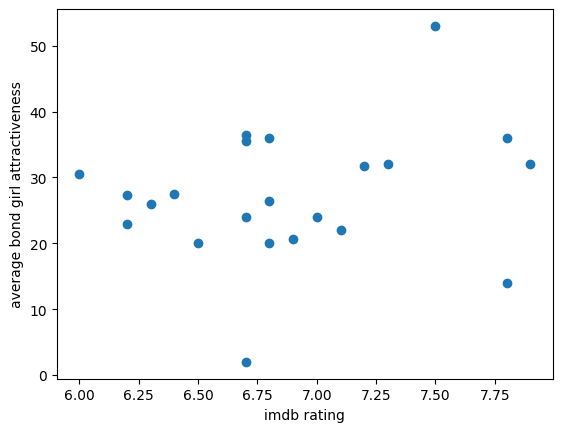

In [24]:
import matplotlib.pyplot as plt

#Initial plot

plt.scatter(IMDB, HOT)
plt.xlabel('imdb rating')
plt.ylabel('average bond girl attractiveness')
plt.show()

#Doesn't seem to be any correlation here, but let's check anyway

In [25]:
from sklearn.linear_model import LinearRegression

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [26]:
x = merged_df.loc[:, ['imdb']]
y = merged_df.loc[:, 'Average Attractiveness']

#Get the data required for linear regression

In [27]:
#Use linear regression to find a linear fit between the attractiveness and imdb score

model = LinearRegression()
model.fit(x, y)

r_squared = f"R-Squared: {model.score(x, y):.2f}"
best_fit = f"y = {model.coef_[0]:.4f}x{model.intercept_:+.4f}"
y_pred = model.predict(x)

In [28]:
print(r_squared) #print r^2

#As expected, there's no correlation here

R-Squared: 0.04


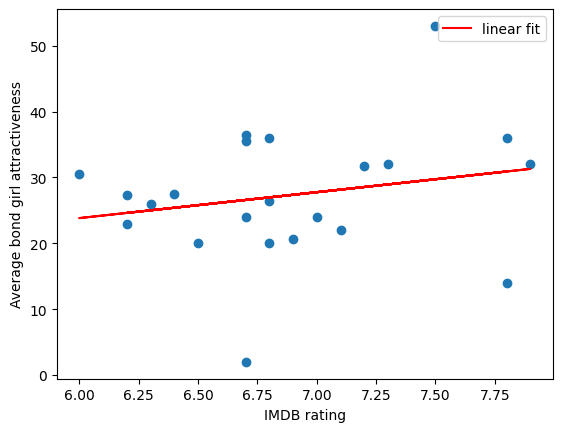

In [29]:
#Plot the fitted model, just to make sure everything worked out correctly

def fit(x):
    return model.coef_[0] * x + model.intercept_

YFIT = fit(IMDB)

plt.scatter(IMDB, HOT)
plt.plot(IMDB, YFIT, color='red', label='linear fit')
plt.xlabel('IMDB rating')
plt.ylabel('Average bond girl attractiveness')
plt.legend()
plt.show()

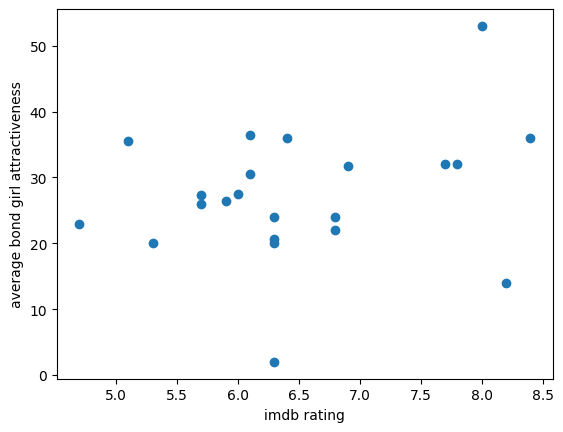

In [31]:
#Check the same for rotten tomatoes score, just in case

RT = np.array(merged_df['rotten_tomatoes'].tolist())
HOT = np.array(merged_df['Average Attractiveness'].tolist())

plt.scatter(RT, HOT)
plt.xlabel('imdb rating')
plt.ylabel('average bond girl attractiveness')
plt.show()

In [33]:
x = merged_df.loc[:, ['rotten_tomatoes']]
y = merged_df.loc[:, 'Average Attractiveness']

model = LinearRegression()
model.fit(x, y)

r_squared = f"R-Squared: {model.score(x, y):.2f}"
best_fit = f"y = {model.coef_[0]:.4f}x{model.intercept_:+.4f}"
y_pred = model.predict(x)
print(r_squared)

#Still no correlation

R-Squared: 0.06
